In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel, QuadraticModel, LorentzianModel


In [2]:
# New things needed here
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
import os
from os import listdir
from os.path import isfile, join



## Set path, and filetype

In [3]:
filetype='headless_txt'
path=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Spectra\Skewness_tests'
Diad_files=pf.get_diad_files(path, file_ext='.txt')
Diad_files

exclude type
.png


['G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR) (1).txt',
 'G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR).txt',
 'G170_004_2_4_10MW_1800G_5S_1ACC (CRR).txt',
 'G170_004_2_4_10MW_1800G_5S_5ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_3ACC (CRR).txt']

## Tweak fit for 1 file before you loop

In [4]:
#filename=Diad_files[1]
path=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Spectra\Skewness_tests'
filename='G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt'

int_cut_off=0.3 # Cut off intensity from peak to assess skewness
skewness='abs' # Calculates absolute skewness, e.g., biggest possible value

float64
float64


C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

,Skewness_diad2,LHS_tie_diad2,RHS_tie_diad2
0,1.403994,1386.074514,1388.72501


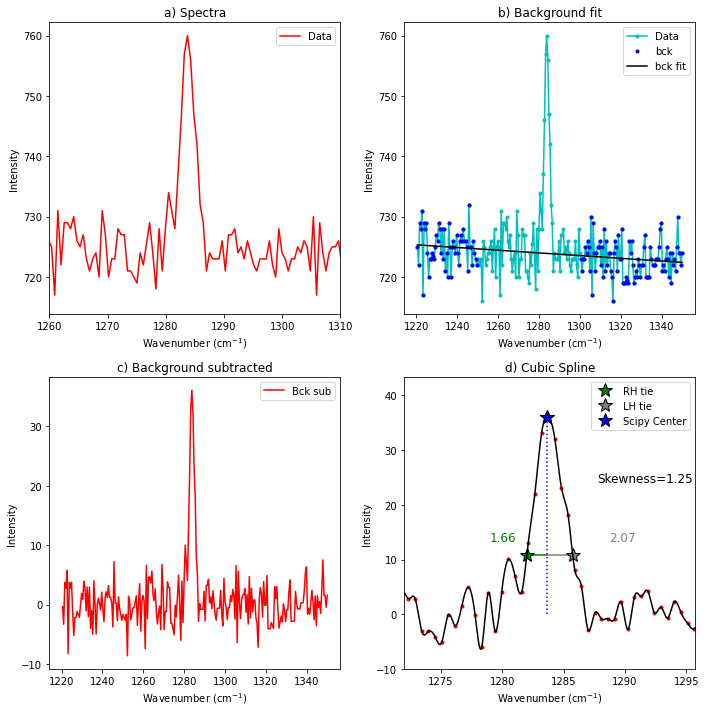

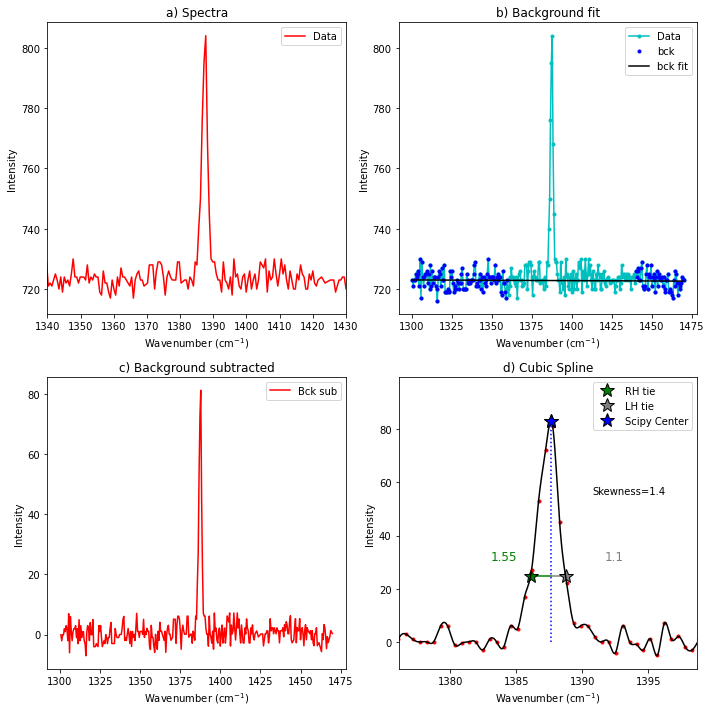

In [5]:
#import warnings
#warnings.filterwarnings('error')
 
AR_test_diad1=pf.assess_diad1_skewness(int_cut_off=int_cut_off, skewness=skewness,
                        path=path, filename=filename, filetype=filetype, 
                        exclude_range1=None, exclude_range2=None,
                        N_poly_bck_diad1=1, lower_baseline_diad1=[1220, 1250],
                        upper_baseline_diad1=[1300, 1350], save_fig=True, dpi=300)
AR_test_diad1

AR_test_diad2=pf.assess_diad2_skewness(int_cut_off=int_cut_off, skewness=skewness,path=path, filename=filename, filetype=filetype, 
                        exclude_range1=None, exclude_range2=None,
                        N_poly_bck_diad2=1, lower_baseline_diad2=[1300, 1360],
                        upper_baseline_diad2=[1440, 1470], save_fig=True,
                             dpi=200)
AR_test_diad2

## Now lets loop through all the files

exclude type
.png
working on file #0
float64
float64


C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

<class 'pandas.core.frame.DataFrame'>


ValueError: too many values to unpack (expected 2)

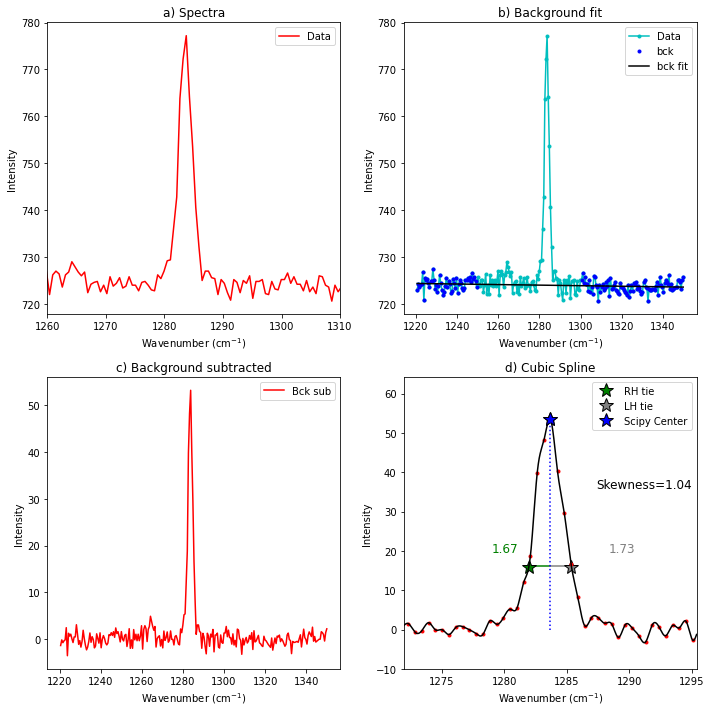

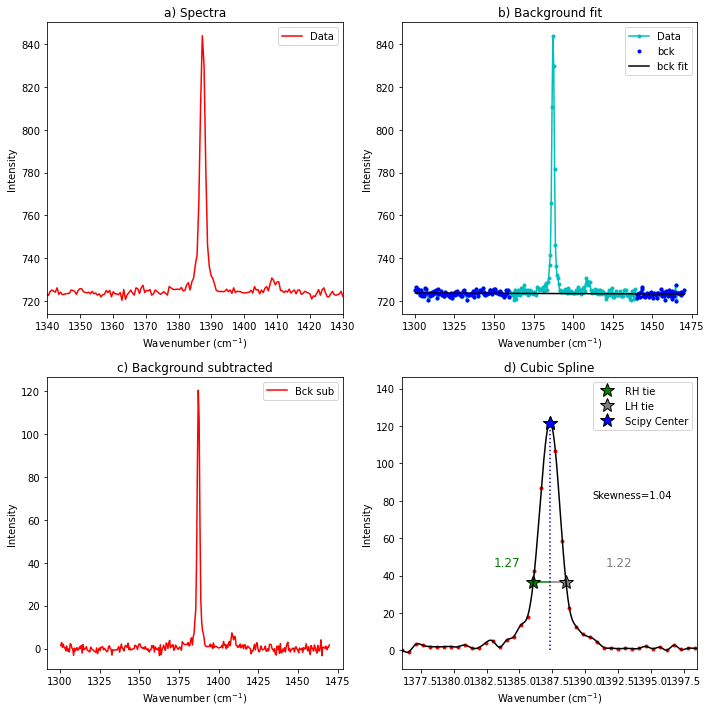

In [6]:
df_diad1, df_diad2=pf.loop_diad_skewness(path=path, skewness=skewness, filetype=filetype,
file_ext='.txt',
int_cut_off=0.3, N_poly_bck_diad1=1, exclude_range1_diad1=None,
exclude_range2_diad1=None, lower_baseline_diad1=[1220, 1250],
upper_baseline_diad1=[1300, 1350],
N_poly_bck_diad2=1,  exclude_range1_diad2=None, 
exclude_range2_diad2=None, lower_baseline_diad2=[1300, 1360],
upper_baseline_diad2=[1440, 1470], save_fig=True, dpi=300)

In [9]:
import Thermobar as pt
plt.plot(df_combo['Skewness_diad1'],
         df_combo['Skewness_diad2'],
         'or')
plt.xlabel('Skewness Diad 1')
plt.ylabel('Skewness Diad 2')

Stats=pt.calculate_R2(df_combo['Skewness_diad1'],
         df_combo['Skewness_diad2'])
print("R2="+str(Stats['R2']))

TypeError: 'NoneType' object is not subscriptable

In [7]:
df_combo

NameError: name 'df_combo' is not defined